In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('data.csv',skiprows=23)

In [3]:
df.rename(columns={'Unnamed: 0':'qlt_assesment', 'Unnamed: 1':'ret_abn' }, inplace=True)
df.rename(columns={'Unnamed: 2':'MA_5', 'Unnamed: 3':'MA_6', 'Unnamed: 4':'MA_7', 'Unnamed: 5':'MA_8', 'Unnamed: 6':'MA_9', 'Unnamed: 7':'MA_10'}, inplace=True)
df.rename(columns={'Unnamed: 8':'exudates1', 'Unnamed: 9':'exudates2', 'Unnamed: 10':'exudates3', 'Unnamed: 11':'exudates4', 'Unnamed: 12':'exudates5', 'Unnamed: 13':'exudates6', 'Unnamed: 14':'exudates7', 'Unnamed: 15':'exudates8'}, inplace=True)
df.rename(columns={'Unnamed: 16':'euc_dis', 'Unnamed: 17':'dia_opd', 'Unnamed: 18':'AMorFM', 'Unnamed: 19':'DR'}, inplace=True)
df=df.astype(float)

In [4]:
df = df[(df.qlt_assesment==1)]

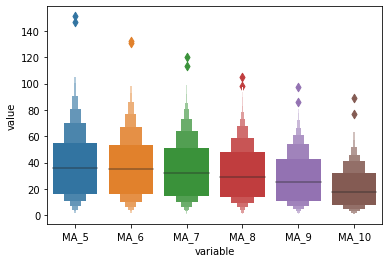

In [5]:
df1=pd.DataFrame(data=df,columns=['MA_5', 'MA_6', 'MA_7', 'MA_8', 'MA_9','MA_10'])      
sns.boxenplot(x="variable",y="value",data=pd.melt(df1))
plt.show()

In [6]:
# df = df[~(df['MA_5'] >=65)]
# df = df[~(df['MA_6'] >=65)]
# df = df[~(df['MA_7'] >=70)]
# df = df[~(df['MA_8'] >=60)]
# df = df[~(df['MA_9'] >=55)]
# df = df[~(df['MA_10'] >=50)]

In [7]:
df = df[~(df['MA_5'] >=80)]
df = df[~(df['MA_6'] >=80)]
df = df[~(df['MA_7'] >=80)]
df = df[~(df['MA_8'] >=80)]
df = df[~(df['MA_9'] >=80)]
df = df[~(df['MA_10'] >=50)]

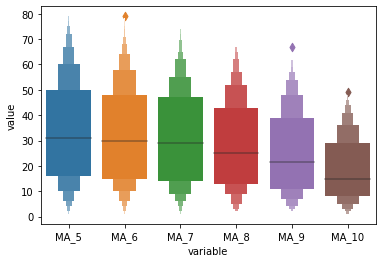

In [8]:
df1=pd.DataFrame(data=df,columns=['MA_5', 'MA_6', 'MA_7', 'MA_8', 'MA_9','MA_10'])      
sns.boxenplot(x="variable",y="value",data=pd.melt(df1))
plt.show()

In [9]:
#df.describe

<bound method NDFrame.describe of       qlt_assesment  ret_abn  MA_5  MA_6  ...   euc_dis   dia_opd  AMorFM   DR
0               1.0      1.0  22.0  22.0  ...  0.486903  0.100025     1.0  0.0
1               1.0      1.0  24.0  24.0  ...  0.520908  0.144414     0.0  0.0
2               1.0      1.0  62.0  60.0  ...  0.530904  0.128548     0.0  1.0
3               1.0      1.0  55.0  53.0  ...  0.483284  0.114790     0.0  0.0
4               1.0      1.0  44.0  44.0  ...  0.475935  0.123572     0.0  1.0
...             ...      ...   ...   ...  ...       ...       ...     ...  ...
1146            1.0      1.0  34.0  34.0  ...  0.537470  0.116795     0.0  0.0
1147            1.0      1.0  49.0  49.0  ...  0.516733  0.124190     0.0  0.0
1148            1.0      0.0  49.0  48.0  ...  0.560632  0.129843     0.0  0.0
1149            1.0      1.0  39.0  36.0  ...  0.485972  0.106690     1.0  1.0
1150            1.0      1.0   7.0   7.0  ...  0.556192  0.088957     0.0  0.0

[1040 rows x 20 c

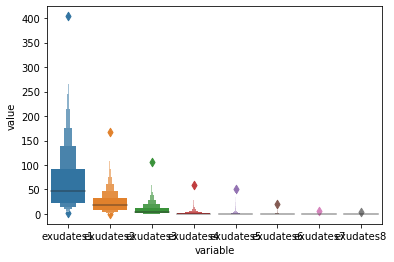

In [10]:
df2=pd.DataFrame(data=df,columns=['exudates1', 'exudates2', 'exudates3', 'exudates4', 'exudates5', 'exudates6', 'exudates7', 'exudates8'])      
sns.boxenplot(x="variable",y="value",data=pd.melt(df2))
plt.show()

In [11]:
df = df[~(df['exudates1'] >=250)]
df = df[~(df['exudates2'] >=100)]
df = df[~(df['exudates3'] >=75)]
df = df[~(df['exudates4'] >=25)]
df = df[~(df['exudates5'] >=25)]
df = df[~(df['exudates6'] >=0.01)]
df = df[~(df['exudates7'] >=0.1)]
df = df[~(df['exudates8'] >=0.1)]

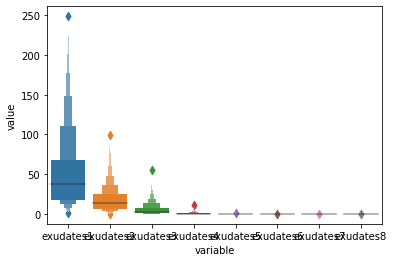

In [12]:
df2=pd.DataFrame(data=df,columns=['exudates1', 'exudates2', 'exudates3', 'exudates4','exudates5', 'exudates6', 'exudates7', 'exudates8'])      
sns.boxenplot(x="variable",y="value",data=pd.melt(df2))
plt.show()

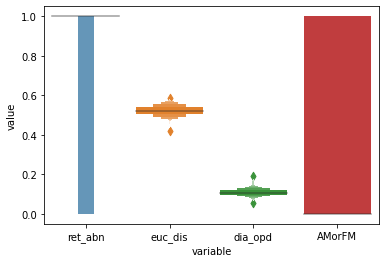

In [13]:
df3=pd.DataFrame(data=df,columns=['ret_abn','euc_dis','dia_opd', 'AMorFM'])   
sns.boxenplot(x="variable",y="value",data=pd.melt(df3))
plt.show()

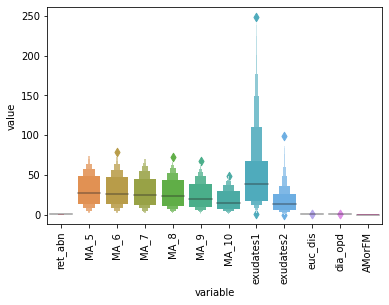

In [14]:
df3=pd.DataFrame(data=df,columns=['ret_abn','MA_5', 'MA_6', 'MA_7', 'MA_8', 'MA_9','MA_10', 'exudates1', 'exudates2','euc_dis','dia_opd','AMorFM'])      
ax = sns.boxenplot(x="variable",y="value",data=pd.melt(df3))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [15]:
x=df[['MA_5', 'MA_6', 'MA_7', 'MA_8', 'MA_9','MA_10', 'exudates1','exudates3', 'exudates4',
       'exudates5', 'exudates6', 'exudates7', 'exudates8','euc_dis','dia_opd']]
y=df[['DR']]
x=np.array(x)
y=np.array(y)


In [16]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [20]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [21]:
clf1 = SVC(kernel='poly', gamma=0.001,probability=True)
clf2 = GradientBoostingClassifier(learning_rate=0.01,max_depth=5)
clf3 = LogisticRegression(solver='newton-cg',max_iter=10000,multi_class='multinomial')      
    
eclf = VotingClassifier(estimators=[('SVM', clf1), ('GradientBoost', clf2),('lgr',clf3)],voting='soft',weights=[2,1,4]) 
eclf = eclf.fit(x_train, y_train.ravel())  

In [22]:
for clf, label in zip([clf1, clf2, clf3,eclf], ['SVM','GradientBoost','Logistic Regression','Ensemble']):
  scores = cross_val_score(clf, x_test, y_test.ravel(), scoring='accuracy',cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.68 (+/- 0.10) [SVM]
Accuracy: 0.54 (+/- 0.04) [GradientBoost]
Accuracy: 0.73 (+/- 0.10) [Logistic Regression]
Accuracy: 0.73 (+/- 0.08) [Ensemble]


In [23]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [24]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(3, 1, figsize=(5, 20))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

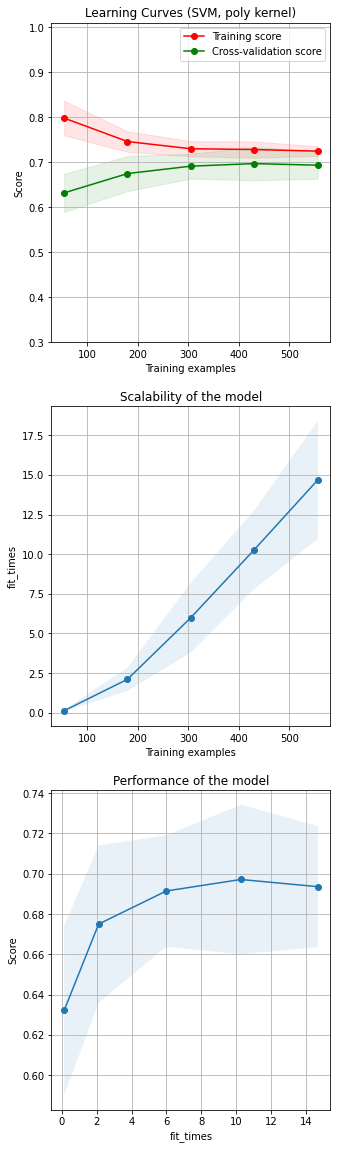

In [25]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = r"Learning Curves (SVM, poly kernel)"
plot_learning_curve(clf1, title, x, y.ravel(), axes=None, ylim=(0.3, 1.01),cv=cv,n_jobs=4)
plt.show()

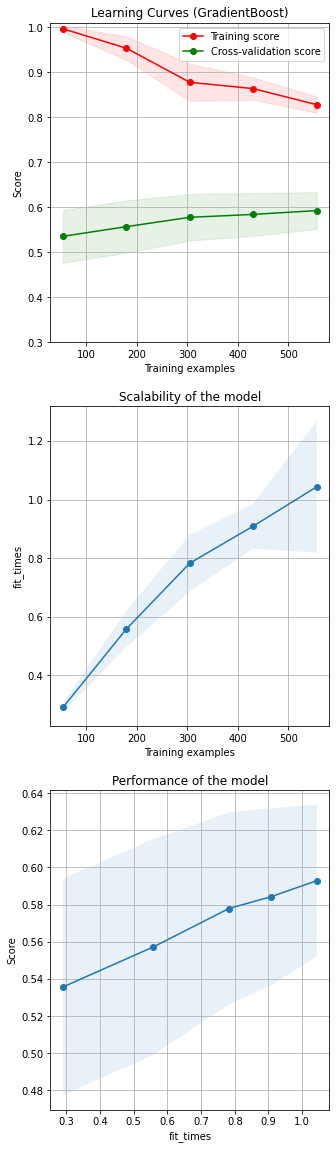

In [26]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = r"Learning Curves (GradientBoost)"
plot_learning_curve(clf2, title, x, y.ravel(), axes=None, ylim=(0.3, 1.01),cv=cv,n_jobs=4)
plt.show()

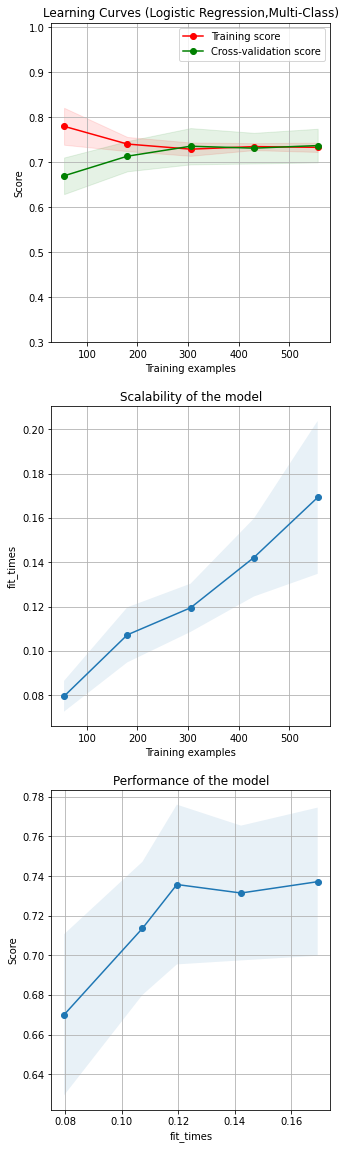

In [27]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = r"Learning Curves (Logistic Regression,Multi-Class)"
plot_learning_curve(clf3, title, x, y.ravel(), axes=None, ylim=(0.3, 1.01),cv=cv,n_jobs=4)
plt.show()

As we see Multi-Class Logistic Regression yields the best result<br>

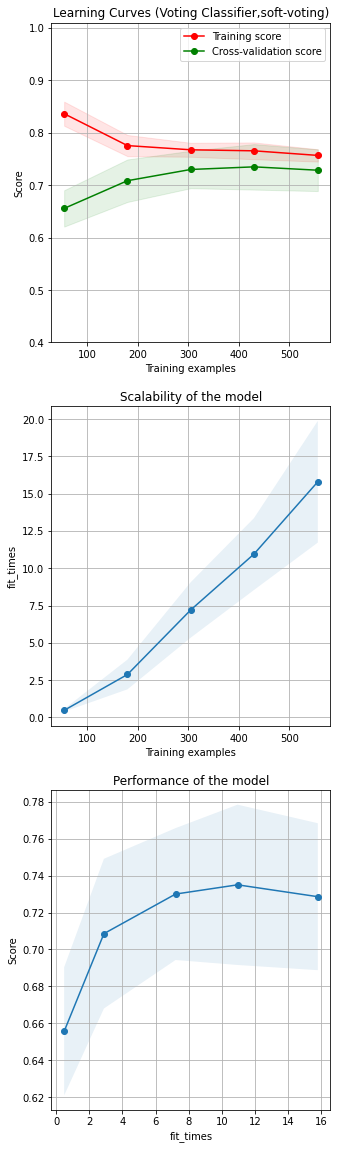

In [28]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = r"Learning Curves (Voting Classifier,soft-voting)"
plot_learning_curve(eclf, title, x, y.ravel(), axes=None, ylim=(0.4, 1.01),cv=cv,n_jobs=4)
plt.show()

In [29]:
y_pred = eclf.predict(x_test)

In [30]:
#testing accuracy score
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

Accuracy: 0.7626


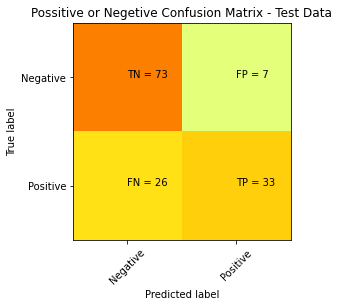

In [31]:
#confusion metrics
cm=metrics.confusion_matrix(y_test,y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Possitive or Negetive Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [32]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve
import plotly.express as px

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
precision, recall,_ = precision_recall_curve(y_test, y_pred)

In [34]:
fig = px.area(x=fpr, y=tpr,title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=0, y1=1)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [35]:
fig = px.area(x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=800, height=500
)
fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=1, y1=0)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()